# Lung Cancer Segmentation for Suspected Tumor

In [1]:
#Import libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

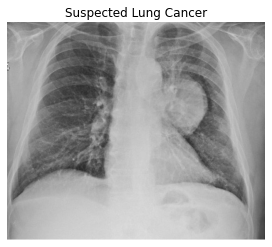

In [2]:
#read and display image
image=cv2.imread('C:/Users/val-c/Xray chest cancer.png')
image=cv2.cvtColor(image,
                   cv2.COLOR_BGR2RGB
)
plt.axis('off')
plt.title('Suspected Lung Cancer')
_=plt.imshow(image)
#print('Looking at the left side, you could see a rounded white lump at the left lung')


Looking at the left side of the image, you could see a rounded white lump at the left lung, it is an indication for further image processing

threshhold limit:142.0


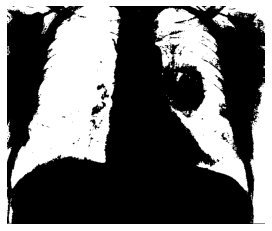

In [3]:
#get image_mask..
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print('threshhold limit:' +str(ret))
plt.axis('off')
_=plt.imshow(thresh, cmap='gray') #display

The white image part of the left lung showed a hole for the suspected tumor area

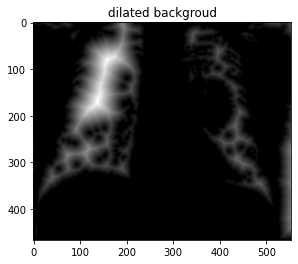

In [4]:
#dilation on the image
kernel=np.ones((3,3),np.uint8)
get_img=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

#background
sure_bg=cv2.dilate(get_img, kernel, iterations=3)

#front area
dist_transform=cv2.distanceTransform(get_img,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0) # defining the tranform

sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg, sure_fg) #abs bkg from image
plt.imshow(dist_transform, cmap='gray')
_=plt.title('dilated backgroud')


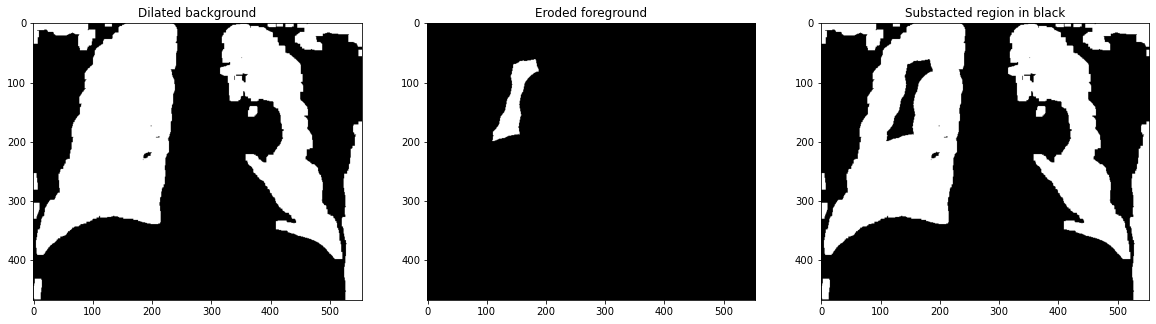

In [5]:
#plot and display segmented masks
fig=plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(sure_bg,cmap='gray')
plt.title('Dilated background')

plt.subplot(132)
plt.imshow(sure_fg,cmap='gray')
_=plt.title('Eroded foreground')

plt.subplot(133)
#plot
plt.imshow(unknown,cmap='gray')
_=plt.title('Substacted region in black')

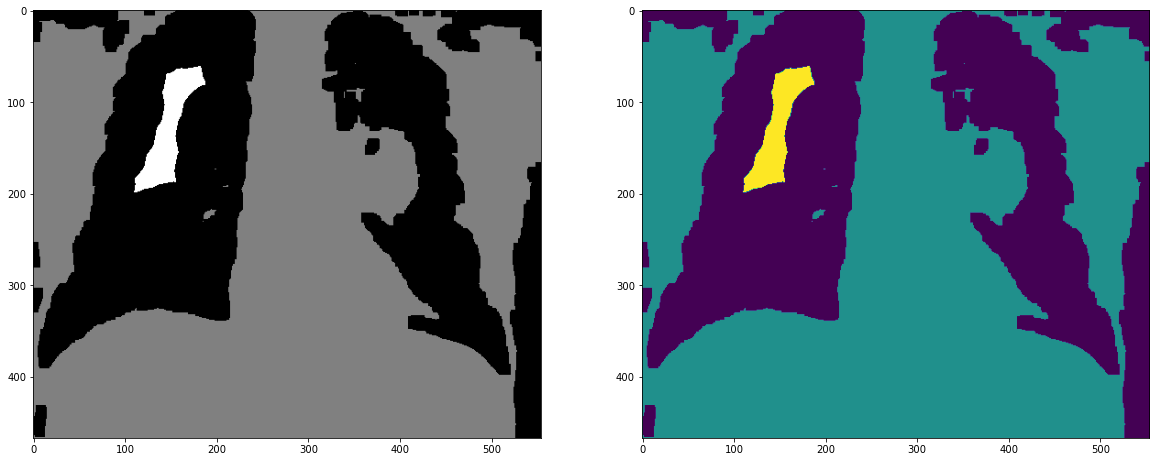

In [6]:
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers + 1 #make area
markers[unknown==255]=0
fig=plt.figure(figsize=(20,10)) #define figure size
plt.subplot(121)
plt.imshow(markers, cmap='gray') 
plt.subplot(122)
_=plt.imshow(markers) #display images

The images clearly show the region for the suspected tumor and dilated organ

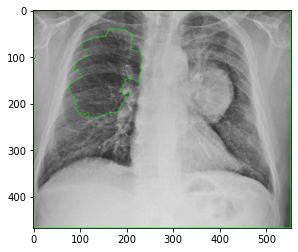

In [7]:
#mark dilated region
markers=cv2.watershed(image,markers)
image[markers==-1]=[0,255,0]
_=plt.imshow(image) #plot show

# summary

Computer Vision plays a great role in healthcare by aiding radiologists and/or surgeons to perceive images and understand what could not be visibly  clear enough for human understanding.
OpenCV is an important technology and library for image processing and analysis.